### IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
import csv
import math
import random
import json


def calculate_angles(pts):
    camera_position_u = 2000-pts[:,0]
    camera_position_v = 1500 - pts[:,1]

    focal_length = 7              # mm
    pixel_size = 2.4             # aziel/micrometer
    f =   focal_length*1000/pixel_size
    
    azimuth_angle = np.arctan2(camera_position_u,f)
    elevation_angle = np.arctan2(f,np.multiply(camera_position_v,np.cos(azimuth_angle)))
    return np.degrees(azimuth_angle), np.degrees(elevation_angle)

def euclidian_distance (pt1, pt2):
    return ((pt1[:,0] - pt2[:,0])**2 + (pt1[:,1] - pt2[:,1])**2)**0.5

def calculate_distance_cm(pt1, pt2,distanc_cm = 100):
    pixel_size_mm = 2.4 * 10**(-3)              # pixel size in mm
    focal_length_mm = 7                     # focal length in mm

    x_distance_cm = abs(pt1[1]- pt2[1]) * pixel_size_mm* distanc_cm/(focal_length_mm)
    y_distance_cm = abs(pt1[0]-pt2[0]) * pixel_size_mm* distanc_cm/focal_length_mm 

    distance_cm = math.sqrt(x_distance_cm**2 + y_distance_cm**2)
    return distance_cm


***DEMO DISTANCE***

In [2]:
ALPHA  = 4
points = []

def mouse_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        points.append([x* ALPHA,y*ALPHA])

image = cv.imread('./data/demo/experimental_size.jpg')
assert image is not None
image_ = cv.resize(image,(int(image.shape[1]/ALPHA),int(image.shape[0]/ALPHA)))



cv.namedWindow('CALIBRATION')
cv.setMouseCallback('CALIBRATION', mouse_callback)
cv.imshow('CALIBRATION', image_)
cv.waitKey(0)

calculate_distance_cm(points[0],points[-1])

29.486990005625128

## PERFORMANCE

### *Tripod Performance*

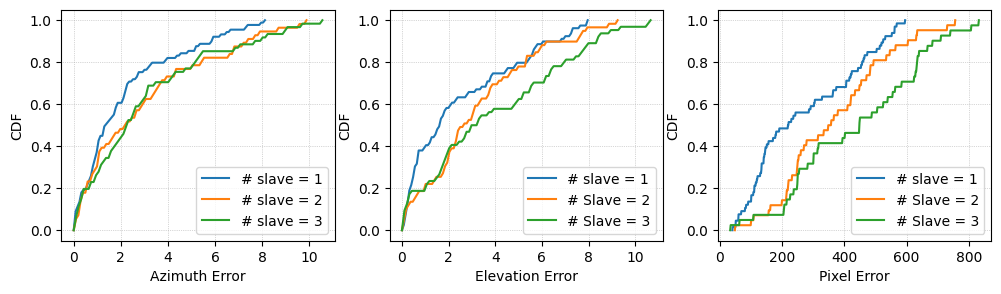

In [170]:
##  SLAVE I 
src_pts = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles = calculate_angles(src_pts)
src_azimuth,src_elevation = src_angles[0],src_angles[1]

dst_angles = calculate_angles(dst_pts)
dst_azimuth, dst_elevation = dst_angles[0],dst_angles[1]

diff_azimuth = np.abs(src_azimuth - dst_azimuth)
diff_azimuth = diff_azimuth[diff_azimuth<10]
c_azimuth, bins_azimuth = np.histogram(diff_azimuth, bins=100)
pdf_azimuth = c_azimuth / sum(c_azimuth)
cdf_azimuth = np.cumsum(pdf_azimuth)

diff_elevation = np.abs(src_elevation - dst_elevation)
diff_elevation = diff_elevation[diff_elevation<8]
c_elevation, bins_elevation = np.histogram(diff_elevation, bins=100)
pdf_elevation = c_elevation / sum(c_elevation)
cdf_elevation = np.cumsum(pdf_elevation)

diff = euclidian_distance(src_pts, dst_pts)
diff = diff.astype(int)[(diff>40)& (diff<600)]
tri_q1 = (np.percentile(diff, 25), np.percentile(diff,50), np.percentile(diff,75))
count, bins_count = np.histogram(diff, bins=500)
pdf = count / sum(count)
cdf = np.cumsum(pdf)


# SLAVE - II
src_pts2 = np.loadtxt('./results/performance/two_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts2 = np.loadtxt('./results/performance/two_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles2 = calculate_angles(src_pts2)
src_azimuth2,src_elevation2 = src_angles2[0],src_angles2[1]

dst_angles2 = calculate_angles(dst_pts2)
dst_azimuth2, dst_elevation2 = dst_angles2[0],dst_angles2[1]

diff_azimuth2 = np.abs(src_azimuth2 - dst_azimuth2)
diff_azimuth2 = diff_azimuth2[diff_azimuth2<10]
c_azimuth2, bins_azimuth2 = np.histogram(diff_azimuth2, bins=100)
pdf_azimuth2 = c_azimuth2 / sum(c_azimuth2)
cdf_azimuth2 = np.cumsum(pdf_azimuth2)

diff_elevation2 = np.abs(src_elevation2 - dst_elevation2)
diff_elevation2 = diff_elevation2[diff_elevation2<10]
c_elevation2, bins_elevation2 = np.histogram(diff_elevation2, bins=100)
pdf_elevation2 = c_elevation2 / sum(c_elevation2)
cdf_elevation2 = np.cumsum(pdf_elevation2)

diff2 = euclidian_distance(src_pts2, dst_pts2)
diff2 = diff2.astype(int)[(diff2>40)& (diff2<800)]
tri_q2 = (np.percentile(diff2, 25), np.percentile(diff2,50), np.percentile(diff2,75))
count2, bins_count2 = np.histogram(diff2, bins=500)
pdf2 = count2 / sum(count2)
cdf2 = np.cumsum(pdf2)

# SLAVE - III
src_pts3 = np.loadtxt('./results/performance/three_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts3 = np.loadtxt('./results/performance/three_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles3 = calculate_angles(src_pts3)
src_azimuth3,src_elevation3 = src_angles3[0],src_angles3[1]

dst_angles3 = calculate_angles(dst_pts3)
dst_azimuth3, dst_elevation3 = dst_angles3[0],dst_angles3[1]

diff_azimuth3 = np.abs(src_azimuth3 - dst_azimuth3)
diff_azimuth3 = diff_azimuth3[diff_azimuth3<11]
c_azimuth3, bins_azimuth3 = np.histogram(diff_azimuth3, bins=100)
pdf_azimuth3 = c_azimuth3 / sum(c_azimuth3)
cdf_azimuth3 = np.cumsum(pdf_azimuth3)

diff_elevation3 = np.abs(src_elevation3 - dst_elevation3)
diff_elevation3 = diff_elevation3[diff_elevation3<11]
c_elevation3, bins_elevation3 = np.histogram(diff_elevation3, bins=100)
pdf_elevation3 = c_elevation3 / sum(c_elevation3)
cdf_elevation3 = np.cumsum(pdf_elevation3)

diff3 = euclidian_distance(src_pts3, dst_pts3)
diff3 = diff3.astype(int)[(30<diff3 )& (diff3<850)]
tri_q3 = (np.percentile(diff3, 25), np.percentile(diff3,50), np.percentile(diff3,75))
count3, bins_count3 = np.histogram(diff3, bins=500)
pdf3 = count3 / sum(count3)
cdf3 = np.cumsum(pdf3)

fig, ax = plt.subplots(1,3,figsize=(12,3))
# plotting PDF and CDF
ax[0].plot(bins_azimuth, np.concatenate(([0], cdf_azimuth)),label = "# slave = 1")
ax[0].plot(bins_azimuth2, np.concatenate(([0], cdf_azimuth2)),label = "# slave = 2")
ax[0].plot(bins_azimuth3, np.concatenate(([0], cdf_azimuth3)),label = "# slave = 3")
ax[0].set_xlabel("Azimuth Error")
ax[0].set_ylabel("CDF")
ax[0].grid(which = 'major')
ax[0].grid(linestyle=':', linewidth=0.5)
ax[0].legend()


ax[1].plot(bins_elevation, np.concatenate(([0], cdf_elevation)),label = "# slave = 1")
ax[1].plot(bins_elevation2, np.concatenate(([0], cdf_elevation2)),label = "# Slave = 2")
ax[1].plot(bins_elevation3, np.concatenate(([0], cdf_elevation3)),label = "# Slave = 3")
ax[1].set_xlabel("Elevation Error")
ax[1].set_ylabel("CDF")
ax[1].grid(which = 'major')
ax[1].grid(linestyle=':', linewidth=0.5)
ax[1].legend()


ax[2].plot(bins_count, np.concatenate(([0], cdf)),label = "# slave = 1")
ax[2].plot(bins_count2, np.concatenate(([0], cdf2)),label = "# Slave = 2")
ax[2].plot(bins_count3, np.concatenate(([0], cdf3)),label = "# Slave = 3")
ax[2].set_xlabel("Pixel Error")
ax[2].set_ylabel("CDF")
ax[2].grid(which = 'major')
ax[2].grid(linestyle=':', linewidth=0.5)
ax[2].legend()

plt.show()

### *UI Based Performance*

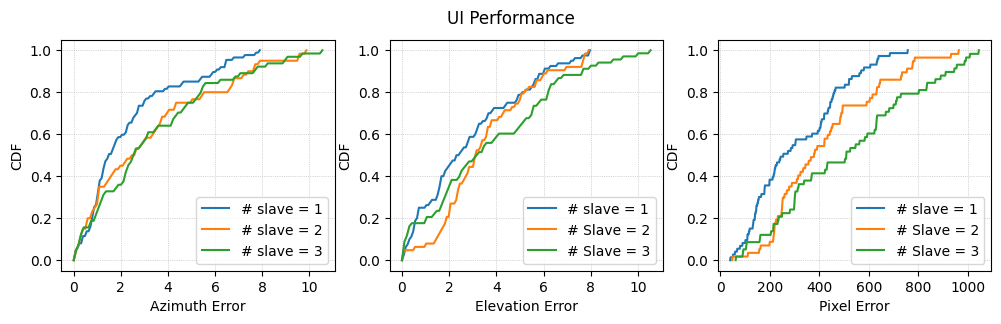

In [171]:
##  SLAVE I 
src_pts = np.loadtxt('./results/performance/single_slave_UI.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts = np.loadtxt('./results/performance/single_slave_UI.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles = calculate_angles(src_pts)
src_azimuth,src_elevation = src_angles[0],src_angles[1]

dst_angles = calculate_angles(dst_pts)
dst_azimuth, dst_elevation = dst_angles[0],dst_angles[1]

diff_azimuth = np.abs(src_azimuth - dst_azimuth)
diff_azimuth = diff_azimuth[diff_azimuth<9]
c_azimuth, bins_azimuth = np.histogram(diff_azimuth, bins=100)
pdf_azimuth = c_azimuth / sum(c_azimuth)
cdf_azimuth = np.cumsum(pdf_azimuth)

diff_elevation = np.abs(src_elevation - dst_elevation)
diff_elevation = diff_elevation[diff_elevation<9]
c_elevation, bins_elevation = np.histogram(diff_elevation, bins=100)
pdf_elevation = c_elevation / sum(c_elevation)
cdf_elevation = np.cumsum(pdf_elevation)

diff = euclidian_distance(src_pts, dst_pts)
diff = diff.astype(int)[(diff>40)& (diff<800)]
ui_q1 = (np.percentile(diff, 25), np.percentile(diff,50), np.percentile(diff,75))
count, bins_count = np.histogram(diff, bins=500)
pdf = count / sum(count)
cdf = np.cumsum(pdf)


# SLAVE - II
src_pts2 = np.loadtxt('./results/performance/two_slave_UI.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts2 = np.loadtxt('./results/performance/two_slave_UI.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles2 = calculate_angles(src_pts2)
src_azimuth2,src_elevation2 = src_angles2[0],src_angles2[1]

dst_angles2 = calculate_angles(dst_pts2)
dst_azimuth2, dst_elevation2 = dst_angles2[0],dst_angles2[1]

diff_azimuth2 = np.abs(src_azimuth2 - dst_azimuth2)
diff_azimuth2 = diff_azimuth2[diff_azimuth2<11]
c_azimuth2, bins_azimuth2 = np.histogram(diff_azimuth2, bins=100)
pdf_azimuth2 = c_azimuth2 / sum(c_azimuth2)
cdf_azimuth2 = np.cumsum(pdf_azimuth2)

diff_elevation2 = np.abs(src_elevation2 - dst_elevation2)
diff_elevation2 = diff_elevation2[diff_elevation2<10]
c_elevation2, bins_elevation2 = np.histogram(diff_elevation2, bins=100)
pdf_elevation2 = c_elevation2 / sum(c_elevation2)
cdf_elevation2 = np.cumsum(pdf_elevation2)

diff2 = euclidian_distance(src_pts2, dst_pts2)
diff2 = diff2.astype(int)[(diff2>40)& (diff2<1000)]
ui_q2 = (np.percentile(diff2, 25), np.percentile(diff2,50), np.percentile(diff2,75))
count2, bins_count2 = np.histogram(diff2, bins=500)
pdf2 = count2 / sum(count2)
cdf2 = np.cumsum(pdf2)

# SLAVE - III
src_pts3 = np.loadtxt('./results/performance/three_slave_UI.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts3 = np.loadtxt('./results/performance/three_slave_UI.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles3 = calculate_angles(src_pts3)
src_azimuth3,src_elevation3 = src_angles3[0],src_angles3[1]

dst_angles3 = calculate_angles(dst_pts3)
dst_azimuth3, dst_elevation3 = dst_angles3[0],dst_angles3[1]

diff_azimuth3 = np.abs(src_azimuth3 - dst_azimuth3)
diff_azimuth3 = diff_azimuth3[diff_azimuth3<11]
c_azimuth3, bins_azimuth3 = np.histogram(diff_azimuth3, bins=100)
pdf_azimuth3 = c_azimuth3 / sum(c_azimuth3)
cdf_azimuth3 = np.cumsum(pdf_azimuth3)

diff_elevation3 = np.abs(src_elevation3 - dst_elevation3)
diff_elevation3 = diff_elevation3[diff_elevation3<11]
c_elevation3, bins_elevation3 = np.histogram(diff_elevation3, bins=100)
pdf_elevation3 = c_elevation3 / sum(c_elevation3)
cdf_elevation3 = np.cumsum(pdf_elevation3)

diff3 = euclidian_distance(src_pts3, dst_pts3)
diff3 = diff3.astype(int)[(30<diff3 )& (diff3<1050)]
ui_q3 = (np.percentile(diff3, 25), np.percentile(diff3,50), np.percentile(diff3,75))
count3, bins_count3 = np.histogram(diff3, bins=500)
pdf3 = count3 / sum(count3)
cdf3 = np.cumsum(pdf3)

fig, ax = plt.subplots(1,3,figsize=(12,3))
# plotting PDF and CDF
ax[0].plot(bins_azimuth, np.concatenate(([0], cdf_azimuth)),label = "# slave = 1")
ax[0].plot(bins_azimuth2, np.concatenate(([0], cdf_azimuth2)),label = "# slave = 2")
ax[0].plot(bins_azimuth3, np.concatenate(([0], cdf_azimuth3)),label = "# slave = 3")
ax[0].set_xlabel("Azimuth Error")
ax[0].set_ylabel("CDF")
ax[0].grid(which = 'major')
ax[0].grid(linestyle=':', linewidth=0.5)
ax[0].legend()


ax[1].plot(bins_elevation, np.concatenate(([0], cdf_elevation)),label = "# slave = 1")
ax[1].plot(bins_elevation2, np.concatenate(([0], cdf_elevation2)),label = "# Slave = 2")
ax[1].plot(bins_elevation3, np.concatenate(([0], cdf_elevation3)),label = "# Slave = 3")
ax[1].set_xlabel("Elevation Error")
ax[1].set_ylabel("CDF")
ax[1].grid(which = 'major')
ax[1].grid(linestyle=':', linewidth=0.5)
ax[1].legend()


ax[2].plot(bins_count, np.concatenate(([0], cdf)),label = "# slave = 1")
ax[2].plot(bins_count2, np.concatenate(([0], cdf2)),label = "# Slave = 2")
ax[2].plot(bins_count3, np.concatenate(([0], cdf3)),label = "# Slave = 3")
ax[2].set_xlabel("Pixel Error")
ax[2].set_ylabel("CDF")
ax[2].grid(which = 'major')
ax[2].grid(linestyle=':', linewidth=0.5)
ax[2].legend()
fig.suptitle("UI Performance")
plt.show()

### *Comparision*

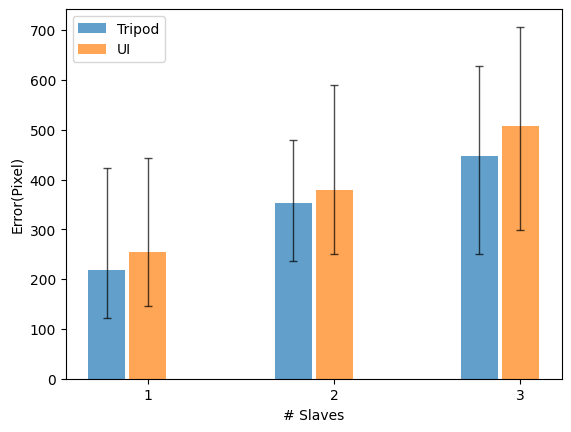

In [186]:

bar_width = .2
N = np.array([1,2,3])
# Create the plot
fig, ax = plt.subplots()

tri_me = np.array([tri_q1[1],tri_q2[1], tri_q3[1]])
tri_low = np.array([tri_q1[0], tri_q2[0], tri_q3[0]])
tri_up = np.array([tri_q1[2], tri_q2[2], tri_q3[2]])

ui_me = np.array([ui_q1[1], ui_q2[1], ui_q3[1]])
ui_low = np.array([ui_q1[0], ui_q2[0], ui_q3[0]])
ui_up = np.array([ui_q1[2], ui_q2[2], ui_q3[2]])

error_config = {'capsize': 3, 'linewidth': 1, 'alpha': 0.7}

bar1 = ax.bar(N - bar_width*1.1, tri_me, bar_width, yerr=[tri_me-tri_low, tri_up-tri_me], error_kw=error_config, label='Tripod',alpha = .7)
bar2 = ax.bar(N , ui_me, bar_width, yerr=[ui_me-ui_low, ui_up-ui_me], error_kw=error_config, label='UI',alpha = .7)

# Customize the plot
ax.set_xlabel('# Slaves')

ax.set_ylabel('Error(Pixel)')
ax.set_xticks(N)
ax.legend()
plt.show()

### *Time Performance*

In [121]:
# FUNCTION TO VISUALIZE ERRORS
def visualize_errors ( CASE,t,ax):
    src_pts = np.loadtxt(f'./results/performance/time/{CASE}_{t}.csv', delimiter=',',usecols=[0,1]).astype(int)   
    dst_pts = np.loadtxt(f'./results/performance/time/{CASE}.csv', delimiter=',',usecols=[0,1]).astype(int)  
    # Calculate the pixel difference
    src_angles = calculate_angles(src_pts)
    src_azimuth,src_elevation = src_angles[0],src_angles[1]

    dst_angles = calculate_angles(dst_pts)
    dst_azimuth, dst_elevation = dst_angles[0],dst_angles[1]

    diff_azimuth = np.abs(src_azimuth - dst_azimuth)
    azimuth_q = [np.percentile(diff_azimuth,25),np.percentile(diff_azimuth,40),np.percentile(diff_azimuth,55)]
    c_azimuth, bins_azimuth = np.histogram(diff_azimuth, bins=100)
    pdf_azimuth = c_azimuth / sum(c_azimuth)
    cdf_azimuth = np.cumsum(pdf_azimuth)

    diff_elevation = np.abs(src_elevation - dst_elevation)
    elevation_q = [np.percentile(diff_elevation,35),np.percentile(diff_elevation,60),np.percentile(diff_elevation,75)]
    c_elevation, bins_elevation = np.histogram(diff_elevation, bins=100)
    pdf_elevation = c_elevation / sum(c_elevation)
    cdf_elevation = np.cumsum(pdf_elevation)

    diff_pixel = euclidian_distance(src_pts, dst_pts)
    diff_pixel = diff_pixel.astype(int)
    pixel_q = [np.percentile(diff_pixel,25),np.percentile(diff_pixel,50),np.percentile(diff_pixel,75)]
    count_pixel, bins_pixel = np.histogram(diff_pixel, bins=500)
    pdf_pixel = count_pixel / sum(count_pixel)
    cdf_pixel = np.cumsum(pdf_pixel)


    # plotting PDF and CDF
    ax[0].plot(bins_azimuth, np.concatenate(([0],cdf_azimuth)))
    ax[0].set_xlabel("Azimuth Error")
    ax[0].set_ylabel("CDF")
    ax[0].grid(which = 'major')
    ax[0].grid(linestyle=':', linewidth=0.5)


    ax[1].plot(bins_elevation, np.concatenate(([0],cdf_elevation)))
    ax[1].set_xlabel("Elevation Error")
    ax[1].set_ylabel("CDF")

    ax[1].set_yticks(np.arange(0,1,.2))
    ax[1].grid(which = 'major')
    ax[1].grid(linestyle=':', linewidth=0.5)

    ax[2].plot(bins_pixel, np.concatenate(([0],cdf_pixel)),label = f'{t}s')
    ax[2].set_xlabel("Pixel Error")
    ax[2].set_ylabel("CDF")
    ax[2].grid(which = 'major')
    ax[2].grid(linestyle=':', linewidth=0.5)
    return (azimuth_q, elevation_q, pixel_q)

In [122]:
T = np.array([5, 10, 15, 20, 25, 30])

# Reflective Environment
with open("./logs/accuracy/reflective_output.txt", "w") as file:
    file.write("REFLECTIVE ENVIRONMENT....!\n")
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))
    fig.suptitle("Reflective Environment")

    azi_inq, ele_inq, pix_inq = [], [], []
    for t in T:
        azimuth_q, elevation_q, pixel_q = visualize_errors(f'indoor', t, ax)
        file.write(f'Median Errors: {t}s of Data Acquisition\n-------------------------------------\n')
        file.write(f"Azimuth Error: {azimuth_q[1]}\n")
        file.write(f"Elevation Error: {elevation_q[1]}\n")
        file.write(f"Pixel Error: {pixel_q[1]}\n\n")
        azi_inq.append(azimuth_q)
        ele_inq.append(elevation_q)
        pix_inq.append(pixel_q)

    azi_inq, ele_inq, pix_inq = np.array(azi_inq), np.array(ele_inq), np.array(pix_inq)

    ax[2].legend()
    plt.close()

# Non-Reflective Environment
with open("./logs/accuracy/ideal_output.txt", "w") as file:
    file.write("IDEAL ENVIRONMENT....!\n")
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))
    fig.suptitle("Ideal Environment")

    azi_outq, ele_outq, pix_outq = [], [], []
    for t in T:
        azimuth_q, elevation_q, pixel_q = visualize_errors(f'outdoor', t, ax)
        file.write(f'Median Errors: {t}s of Data Acquisition\n-------------------------------------\n')
        file.write(f"Azimuth Error: {azimuth_q[1]}\n")
        file.write(f"Elevation Error: {elevation_q[1]}\n")
        file.write(f"Pixel Error: {pixel_q[1]}\n\n")
        azi_outq.append(azimuth_q)
        ele_outq.append(elevation_q)
        pix_outq.append(pixel_q)

    azi_outq, ele_outq, pix_outq = np.array(azi_outq), np.array(ele_outq), np.array(pix_outq)

    ax[2].legend()
    plt.close()

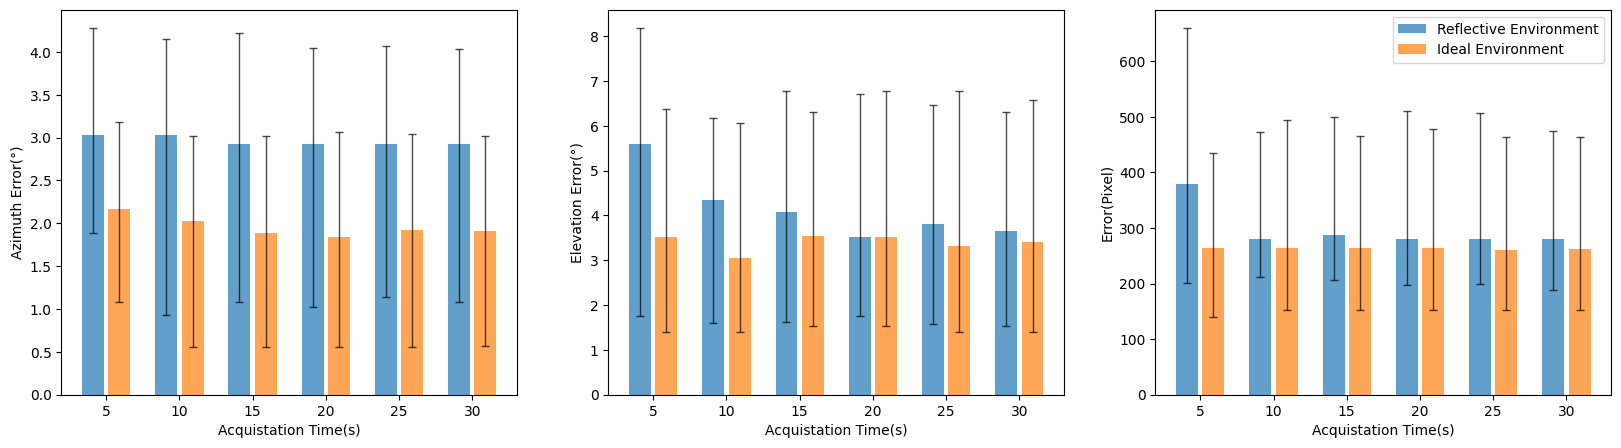

In [124]:

bar_width = 1.5

# Create the plot
fig, ax = plt.subplots(1,3,figsize = (20,5))

error_config = {'capsize': 3, 'linewidth': 1, 'alpha': 0.7}


bar1 = ax[0].bar(T - bar_width*.6, azi_inq[:,1], bar_width, yerr=[azi_inq[:,1]-azi_inq[:,0],.99 * (azi_inq[:,2] - azi_inq[:,1])], error_kw=error_config, label='Reflective Environment',alpha = .7)
bar2 = ax[0].bar(T + bar_width*.6, azi_outq[:,1], bar_width, yerr=[azi_outq[:,1]-azi_outq[:,0],.99* (azi_outq[:,2] - azi_outq[:,1])], error_kw=error_config, label='Ideal Environment', alpha=0.7)
ax[0].set_xlabel('Acquistation Time(s)')
ax[0].set_ylabel('Azimuth Error(°)')
ax[0].set_xticks(T)
# ax[0].legend()


bar1 = ax[1].bar(T - bar_width*.6, ele_inq[:,1], bar_width, yerr=[ele_inq[:,1]-ele_inq[:,0],.99 * (ele_inq[:,2] - ele_inq[:,1])], error_kw=error_config, label='Reflective Environment',alpha = .7)
bar2 = ax[1].bar(T + bar_width*.6, ele_outq[:,1], bar_width, yerr=[ele_outq[:,1]-ele_outq[:,0],.99* (ele_outq[:,2] - ele_outq[:,1])], error_kw=error_config, label='Ideal Environment', alpha=0.7)
ax[1].set_xlabel('Acquistation Time(s)')
ax[1].set_ylabel('Elevation Error(°)')
ax[1].set_xticks(T)
# ax[1].legend()



bar1 = ax[2].bar(T - bar_width*.6, pix_inq[:,1], bar_width, yerr=[pix_inq[:,1]-pix_inq[:,0],.99 * (pix_inq[:,2] - pix_inq[:,1])], error_kw=error_config, label='Reflective Environment',alpha = .7)
bar2 = ax[2].bar(T + bar_width*.6, pix_outq[:,1], bar_width, yerr=[pix_outq[:,1]-pix_outq[:,0],.99* (pix_outq[:,2] - pix_outq[:,1])], error_kw=error_config, label='Ideal Environment', alpha=0.7)
ax[2].set_xlabel('Acquistation Time(s)')
ax[2].set_ylabel('Error(Pixel)')
ax[2].set_xticks(T)
ax[2].legend()
plt.show()

### Distance Performance

In [3]:
# FUNCTION TO VISUALIZE ERRORS
def visualize_errors ( CASE,d,ax):
    dst_pts = np.loadtxt(f'./results/performance/distance/{CASE}_{d}m.csv', delimiter=',',usecols=[0,1]).astype(int)  
    src_pts = np.loadtxt(f'./results/performance/distance/{CASE}_{d}m.csv', delimiter=',',usecols=[2,3]).astype(int)   
    # Calculate the pixel difference
    src_angles = calculate_angles(src_pts)
    src_azimuth,src_elevation = src_angles[0],src_angles[1]

    dst_angles = calculate_angles(dst_pts)
    dst_azimuth, dst_elevation = dst_angles[0],dst_angles[1]

    diff_azimuth = np.abs(src_azimuth - dst_azimuth)
    azimuth_q = [np.percentile(diff_azimuth,25),np.percentile(diff_azimuth,50),np.percentile(diff_azimuth,75)]
    c_azimuth, bins_azimuth = np.histogram(diff_azimuth, bins=100)
    pdf_azimuth = c_azimuth / sum(c_azimuth)
    cdf_azimuth = np.cumsum(pdf_azimuth)

    diff_elevation = np.abs(src_elevation - dst_elevation)
    # diff_elevation = diff_elevation[(diff_elevation>.5) & (diff_elevation<8)]
    elevation_q = [np.percentile(diff_elevation,25),np.percentile(diff_elevation,50),np.percentile(diff_elevation,75)]
    c_elevation, bins_elevation = np.histogram(diff_elevation, bins=100)
    pdf_elevation = c_elevation / sum(c_elevation)
    cdf_elevation = np.cumsum(pdf_elevation)

    diff_pixel = euclidian_distance(src_pts, dst_pts)
    diff_pixel = diff_pixel.astype(int)
    # diff_pixel = diff_pixel[(diff_pixel>50) & (diff_pixel<800)]
    pixel_q = [np.percentile(diff_pixel,25),np.percentile(diff_pixel,50),np.percentile(diff_pixel,75)]
    count_pixel, bins_pixel = np.histogram(diff_pixel, bins=500)
    pdf_pixel = count_pixel / sum(count_pixel)
    cdf_pixel = np.cumsum(pdf_pixel)


    # plotting PDF and CDF
    ax[0].plot(bins_azimuth, np.concatenate(([0],cdf_azimuth)))
    ax[0].set_xlabel("Azimuth Error")
    ax[0].set_ylabel("CDF")
    ax[0].grid(which = 'major')
    ax[0].grid(linestyle=':', linewidth=0.5)


    ax[1].plot(bins_elevation, np.concatenate(([0],cdf_elevation)))
    ax[1].set_xlabel("Elevation Error")
    ax[1].set_ylabel("CDF")

    ax[1].set_yticks(np.arange(0,1,.2))
    ax[1].grid(which = 'major')
    ax[1].grid(linestyle=':', linewidth=0.5)

    ax[2].plot(bins_pixel, np.concatenate(([0],cdf_pixel)),label = f'{d}m')
    ax[2].set_xlabel("Pixel Error")
    ax[2].set_ylabel("CDF")
    ax[2].grid(which = 'major')
    ax[2].grid(linestyle=':', linewidth=0.5)
    return (azimuth_q, elevation_q, pixel_q)

In [9]:
D = np.array([1,2,3,4,5])

CASES = ['one','two','three']
Q_DIS = {}

for CASE in CASES:
    with open(f"./logs/accuracy/{CASE}_distance.txt", "w") as file:
        file.write(f"{CASE} SLAVE\n")
        fig, ax = plt.subplots(1, 3, figsize=(12, 3))
        fig.suptitle(f"{CASE} Slave")

        azi_inq, ele_inq, pix_inq = [], [], []
        for d in D:
            azimuth_q, elevation_q, pixel_q = visualize_errors(f'{CASE}', d, ax)
            file.write(f'Median Errors: {d}m\n-------------------------------------\n')
            file.write(f"Azimuth Error: {azimuth_q[1]}\n")
            file.write(f"Elevation Error: {elevation_q[1]}\n")
            file.write(f"Pixel Error: {pixel_q[1]}\n\n")
            azi_inq.append(azimuth_q)
            ele_inq.append(elevation_q)
            pix_inq.append(pixel_q)

        azi_inq, ele_inq, pix_inq = np.array(azi_inq), np.array(ele_inq), np.array(pix_inq)
        Q_DIS[CASE] = {'azimuth': azi_inq, 'elevation': ele_inq, 'pixel': pix_inq}

        ax[2].legend()
        plt.close()

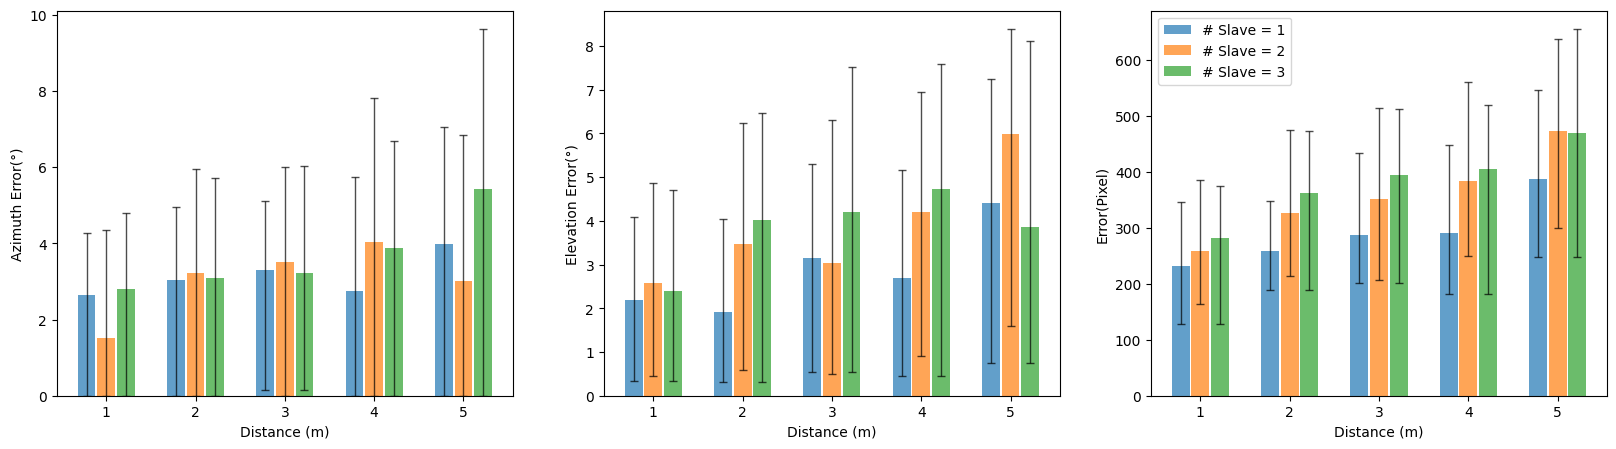

In [13]:

bar_width = .2

# Create the plot
fig, ax = plt.subplots(1,3,figsize = (20,5))

error_config = {'capsize': 3, 'linewidth': 1, 'alpha': 0.7}

# Azimuth Error
azi_oneq = Q_DIS['one']['azimuth']
azi_twoq = Q_DIS['two']['azimuth']
azi_threeq = Q_DIS['three']['azimuth']

bar1 = ax[0].bar(D - bar_width*1.1, azi_oneq[:,1], bar_width, yerr=[azi_oneq[:,1]-azi_oneq[:,0],azi_oneq[:,2] - azi_oneq[:,1]], error_kw=error_config, label='# Slave = 1',alpha = .7)
bar2 = ax[0].bar(D , azi_twoq[:,1], bar_width, yerr=[azi_twoq[:,1]-azi_twoq[:,0],azi_twoq[:,2] - azi_twoq[:,1]], error_kw=error_config, label='# Slave = 2',alpha = .7)
bar3 = ax[0].bar(D + bar_width*1.1, azi_threeq[:,1], bar_width, yerr=[azi_threeq[:,1]-azi_oneq[:,0],azi_threeq[:,2] - azi_threeq[:,1]], error_kw=error_config, label='# Slave = 3',alpha = .7)
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Azimuth Error(°)')
ax[0].set_xticks(D)
# ax[0].legend()   

# Elevation Error
ele_oneq = Q_DIS['one']['elevation']
ele_twoq = Q_DIS['two']['elevation']
ele_threeq = Q_DIS['three']['elevation']

bar1 = ax[1].bar(D - bar_width*1.1, ele_oneq[:,1], bar_width, yerr=[ele_oneq[:,1]-ele_oneq[:,0],ele_oneq[:,2] - ele_oneq[:,1]], error_kw=error_config, label='# Slave = 1',alpha = .7)
bar2 = ax[1].bar(D , ele_twoq[:,1], bar_width, yerr=[ele_twoq[:,1]-ele_twoq[:,0],ele_twoq[:,2] - ele_twoq[:,1]], error_kw=error_config, label='# Slave = 2',alpha = .7)
bar3 = ax[1].bar(D + bar_width*1.1, ele_threeq[:,1], bar_width, yerr=[ele_threeq[:,1]-ele_oneq[:,0],ele_threeq[:,2] - ele_threeq[:,1]], error_kw=error_config, label='# Slave = 3',alpha = .7)
ax[1].set_xlabel('Distance (m)')
ax[1].set_ylabel('Elevation Error(°)')
ax[1].set_xticks(D)
# ax[1].legend()   

# Pixel Error
pix_oneq = Q_DIS['one']['pixel']
pix_twoq = Q_DIS['two']['pixel']
pix_threeq = Q_DIS['three']['pixel']

bar1 = ax[2].bar(D - bar_width*1.1, pix_oneq[:,1], bar_width, yerr=[pix_oneq[:,1]-pix_oneq[:,0],pix_oneq[:,2] - pix_oneq[:,1]], error_kw=error_config, label='# Slave = 1',alpha = .7)
bar2 = ax[2].bar(D , pix_twoq[:,1], bar_width, yerr=[pix_twoq[:,1]-pix_twoq[:,0],pix_twoq[:,2] - pix_twoq[:,1]], error_kw=error_config, label='# Slave = 2',alpha = .7)
bar3 = ax[2].bar(D + bar_width*1.1, pix_threeq[:,1], bar_width, yerr=[pix_threeq[:,1]-pix_oneq[:,0],pix_threeq[:,2] - pix_threeq[:,1]], error_kw=error_config, label='# Slave = 3',alpha = .7)
ax[2].set_xlabel('Distance (m)')
ax[2].set_ylabel('Error(Pixel)')
ax[2].set_xticks(D)
# ax[2].set_ylim([0,1200])
ax[2].legend()   
plt.show()

## Supporting Works

### AoA Visualization

In [149]:
def calculate_aoa(u,v):
    camera_position_u = 2000-u
    camera_position_v = 1500 - v

    focal_length = 6.7              # mm
    pixel_size = 1/0.8              # pixel/micrometer
    f = focal_length*1000/pixel_size
    
    azimuth_angle = np.arctan2(camera_position_u,f)
    elevation_angle = np.arctan2(f,(camera_position_v*np.cos(azimuth_angle)))
    return np.degrees(np.arccos(np.cos(azimuth_angle)*np.sin(elevation_angle)))

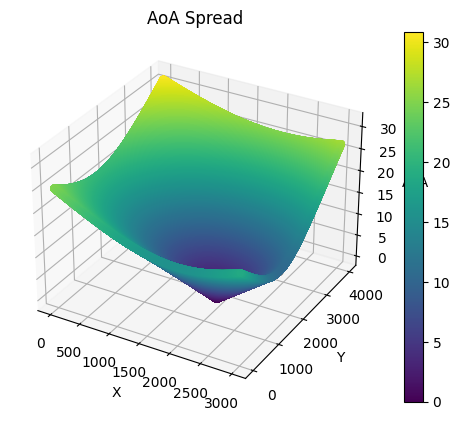

In [26]:

height, width = 4000,3000

# Create arrays for each pixel position
u = np.arange(width)
v = np.arange(height)
U, V = np.meshgrid(u, v)

# Calculate AOA values for all pixel positions using vectorized function
aoa_values = calculate_aoa(U, V)

# Reshape the image into a flat array of pixel values
aoa_values = aoa_values.reshape(-1)

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the gray pixel values in 3D
sc = ax.scatter(U.flatten(), V.flatten(), aoa_values, c=aoa_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('AoA')
ax.set_title('AoA Spread')

# Add colorbar
cbar = plt.colorbar(sc)

# Show the plot
plt.show()

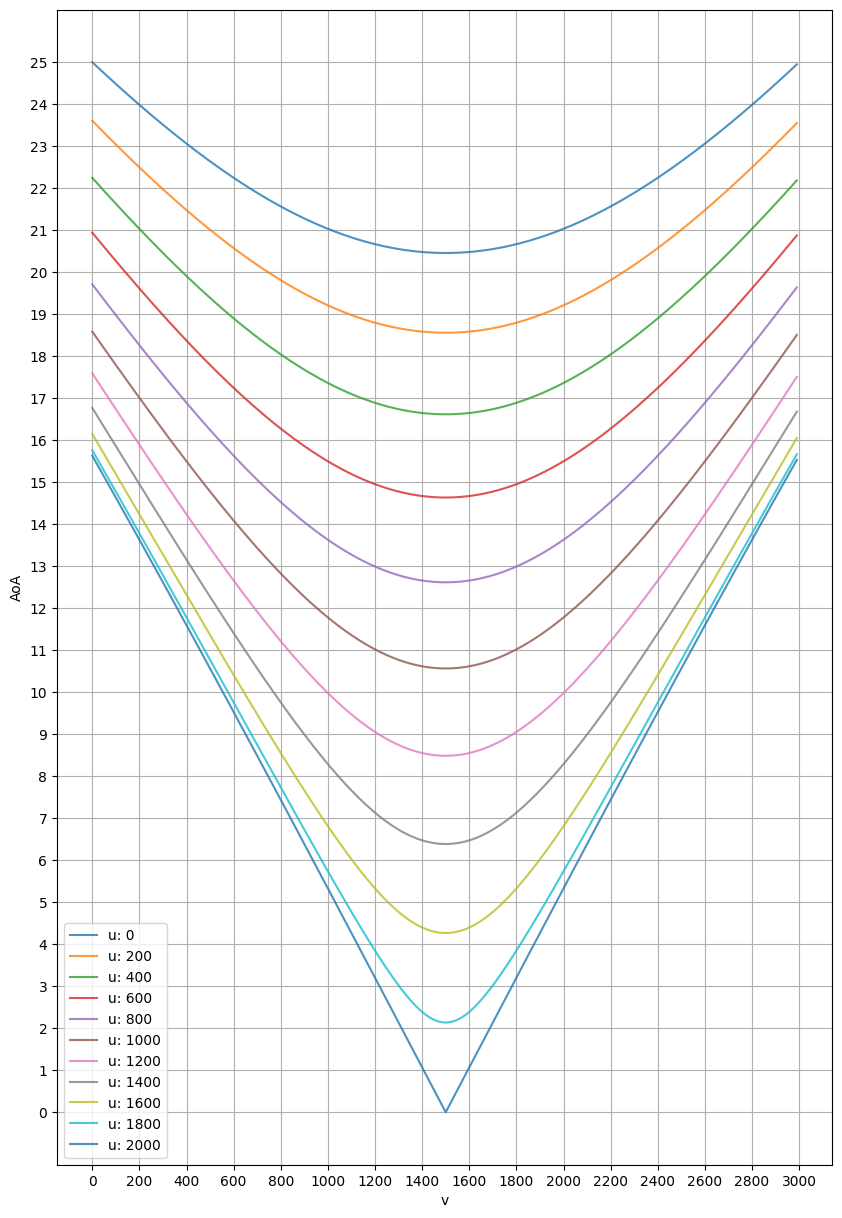

In [154]:
# Create a figure and subplots
plt.figure(figsize = (10,15)) 

case_length = 10
delta_y = 2000//case_length
for case in range(case_length + 1):
    x = np.arange(300)*10
    aoa_x = calculate_aoa(case*delta_y, x)
    plt.plot(x,aoa_x,label  =f"u: {case*delta_y}",alpha =.8)
plt.grid('minor')
plt.xticks(np.arange(0,16)*200)
plt.yticks(np.arange(26))
plt.xlabel('v')
plt.ylabel('AoA')
plt.legend()
plt.show()
    

### *Evaluate the Quality of AoA* 

In [15]:
def calculate_aoa(dst_pt):
    camera_position_u = 2000 - dst_pt[0]
    camera_position_v = 1500 - dst_pt[1]

    focal_length = 7              # mm
    pixel_size = 2.4              # pixel/micrometer
    f =  focal_length*1000/pixel_size
    
    azimuth_angle = np.arctan2(camera_position_u,f)
    elevation_angle = np.arctan2(f,np.multiply(camera_position_v,np.cos(azimuth_angle)))
    aoa =  np.arccos(np.sin(elevation_angle) * np.cos(azimuth_angle))
    return np.degrees(aoa)

In [20]:
ALPHA = 4
points = []

def mouse_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        points.append([x*ALPHA,y*ALPHA])

CASE = 'test91_70'

image = cv.imread(f'./data/aoa_data/{CASE}.jpg')
assert image is not None
image_ = cv.resize(image,(int(image.shape[1]/ALPHA),int(image.shape[0]/ALPHA)))


cv.namedWindow('CALIBRATION')
cv.setMouseCallback('CALIBRATION', mouse_callback)
cv.imshow('CALIBRATION', image_)
cv.waitKey(0)
dst_pt = points[-1]
print(calculate_aoa(dst_pt))
with open(f'./data/aoa_data/{CASE}.json', 'r') as f:
    print(json.load(f))

14.354507105527574
{'80:6F:B0:EE:AD:32': [55, 58, 61, 62, 62, 62, 63, 64, 63, 63, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 61, 61, 62, 63, 62, 61, 62, 62, 62, 61, 61, 63, 63, 63, 62, 61, 62, 62, 62, 61, 62, 64, 62, 61, 61, 63, 62, 61, 62, 63, 63, 63, 63, 63, 63, 64, 63, 63, 63, 63, 63, 62, 62, 63, 63, 62, 62, 62, 62, 63]}
